In [1]:
import pandas as pd
loc25= pd.read_csv('25-17.01.29-02.04.csv')
print(loc25)

     Unnamed: 0   Unnamed: 1          Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                 NaN        NaN   
1           NaN     SITE NO:  25 - Straiton Path        NaN   
2           NaN        Date:            29/01/17        NaN   
3           NaN   Direction:                            NaN   
4           NaN          NaN                 NaN        NaN   
5           NaN         Hour                 P/C    P/C Kph   
6           NaN  00.00-00.59                   0          0   
7           NaN  01.00-01.59                   0          0   
8           NaN  02.00-02.59                   0          0   
9           NaN  03.00-03.59                   0          0   
10          NaN  04.00-04.59                   0          0   
11          NaN  05.00-05.59                   0          0   
12          NaN  06.00-06.59                   0          0   
13          NaN  07.00-07.59                   0          0   
14          NaN  08.00-08.59                   0       

In [2]:
loc25 = loc25.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Roseburn Park - DAILY FLOW BY HOUR')
loc25.drop(loc25.index[[0,1,2,3,4,5]], inplace=True)
loc25.drop(loc25.columns[[0,5]], axis=1, inplace=True)
loc25.index = loc25.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc25.rename(columns=newcols, inplace=True)
loc25

Roseburn Park - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,0,0,0
1,01.00-01.59,0,0,0
2,02.00-02.59,0,0,0
3,03.00-03.59,0,0,0
4,04.00-04.59,0,0,0
5,05.00-05.59,0,0,0
6,06.00-06.59,0,0,0
7,07.00-07.59,0,0,0
8,08.00-08.59,0,0,0
9,09.00-09.59,0,0,0


In [3]:
loc25['Hourstarts'] = loc25.Hour.str.split('-').str.get(0)
loc25['Hourends'] = loc25.Hour.str.split('-').str.get(1)
loc25.drop(loc25.columns[0], axis=1, inplace=True)

In [4]:
loc25.to_csv('Loc25.csv')
loc25 = loc25.dropna(how='all')
loc25 = loc25[loc25.Hourstarts != "Direction:"]
loc25 = loc25[loc25.Hourstarts != "Total"]
loc25 = loc25[loc25.Hourstarts != "Hour"]
loc25 = loc25[loc25.Hourstarts != "Date:"]

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
loc25[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc25[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [7]:
loc25day1 = loc25.iloc[0:24]
loc25day2 = loc25.iloc[24:48]
loc25day3 = loc25.iloc[48:72]
loc25day4 = loc25.iloc[72:96]
loc25day5 = loc25.iloc[96:120]
loc25day6 = loc25.iloc[120:144]
loc25day7 = loc25.iloc[144:168]
#my data is divided into 7 clean sets

In [8]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

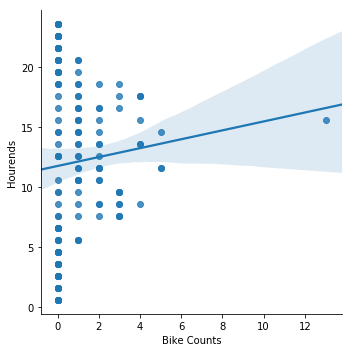

In [9]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc25)

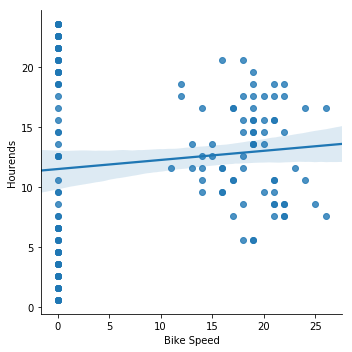

In [10]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc25)

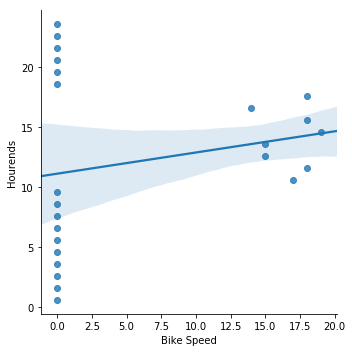

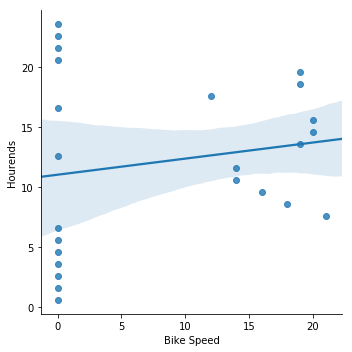

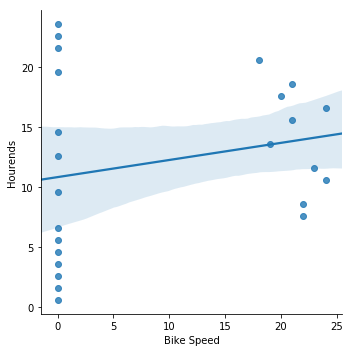

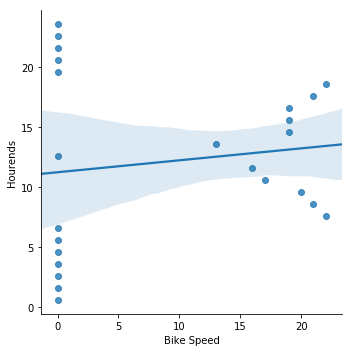

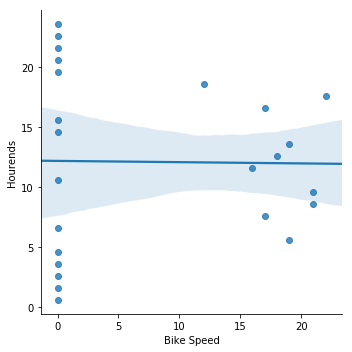

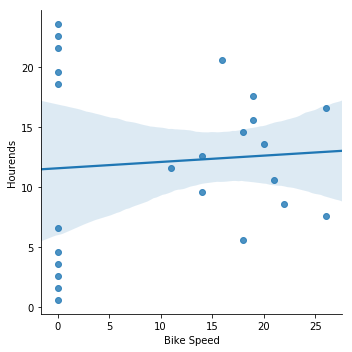

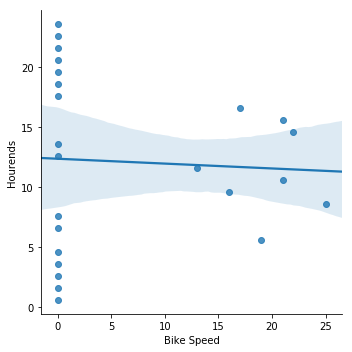

In [11]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc25day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc25day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc25day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc25day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc25day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc25day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc25day7)

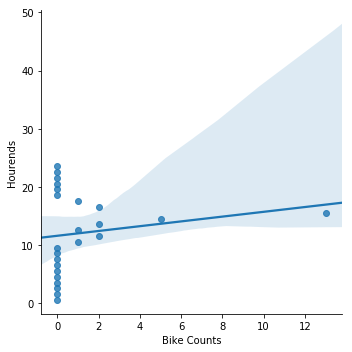

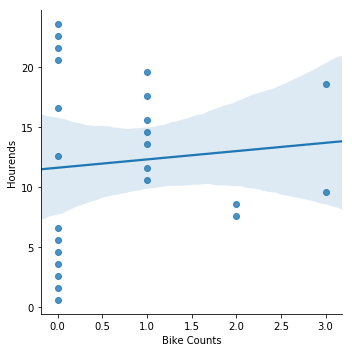

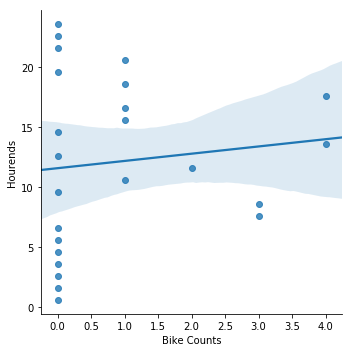

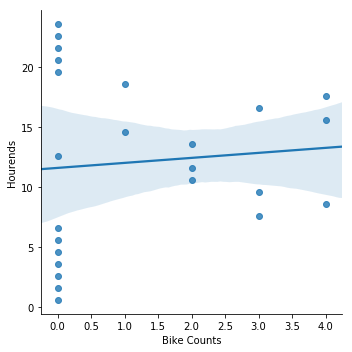

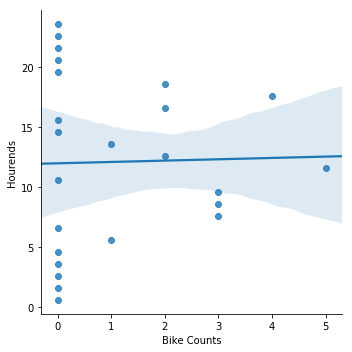

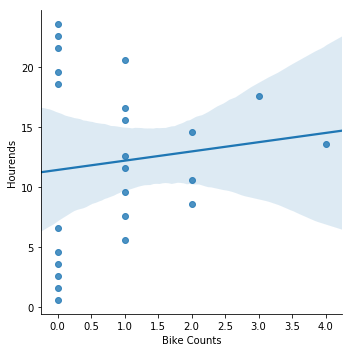

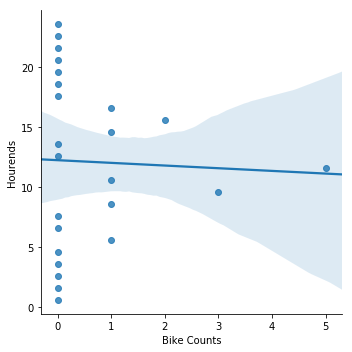

In [12]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc25day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc25day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc25day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc25day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc25day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc25day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc25day7)